## **Import Libraries and Data**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
!pip install openpyxl




In [2]:
# Import data
file_path = 'https://docs.google.com/spreadsheets/d/1-VUT4gIVGeNsLECzqjhnhGv77SPu0Ts4/export?format=xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07


## **EDA**

#### **1/ Overview data:**

In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

-> No incorrect datatype

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [7]:
# Drop null rows with less than 5% values
columns_to_drop = df.columns[df.isnull().sum() / len(df) < 0.05]
df = df.dropna(subset=columns_to_drop)
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [8]:
# Fill missing values based on churn status
churned_median = df[df['Churn'] == 1]['DaySinceLastOrder'].median()
non_churned_median = df[df['Churn'] == 0]['DaySinceLastOrder'].median()

df.loc[df['Churn'] == 1, 'DaySinceLastOrder'] = df.loc[df['Churn'] == 1, 'DaySinceLastOrder'].fillna(churned_median)
df.loc[df['Churn'] == 0, 'DaySinceLastOrder'] = df.loc[df['Churn'] == 0, 'DaySinceLastOrder'].fillna(non_churned_median)

df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


-> All nulls are handled

In [9]:
df.duplicated().any()

False

-> No duplicated value

In [10]:
# Percentage of each Churn class
df['Churn'].value_counts()/len(df)

,count
Churn,
0,0.832149
1,0.167851


-> The dataset has an imbalanced class distribution, with significantly more non-churned users than churned users.

-> This imbalance needs to be addressed when applying the Random Forest model to prevent bias towards the majority class and improve the prediction of churned users.

### 2/ **Unvarinate Analyse**


Unique values of Tenure: 34
Unique values of CityTier: 3
Unique values of WarehouseToHome: 34
Unique values of HourSpendOnApp: 6
Unique values of NumberOfDeviceRegistered: 6
Unique values of SatisfactionScore: 5
Unique values of NumberOfAddress: 14
Unique values of Complain: 2
Unique values of OrderAmountHikeFromlastYear: 16
Unique values of CouponUsed: 16
Unique values of OrderCount: 16
Unique values of DaySinceLastOrder: 22
Unique values of CashbackAmount: 1846


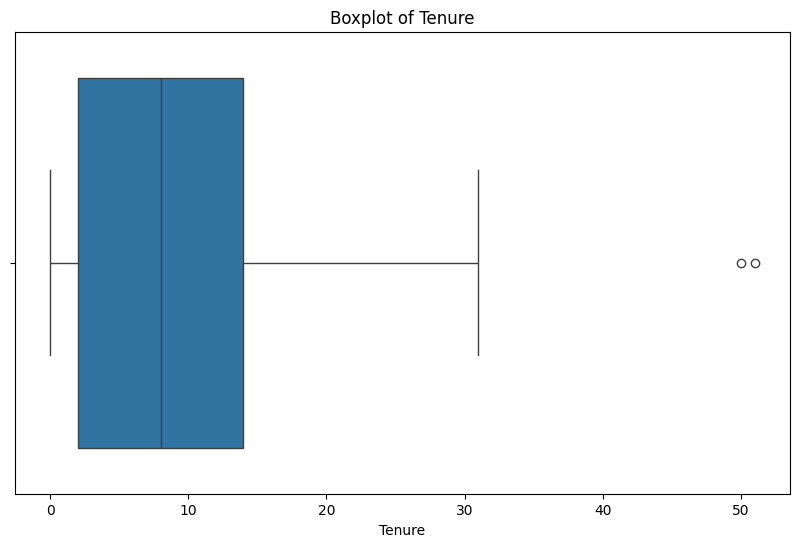

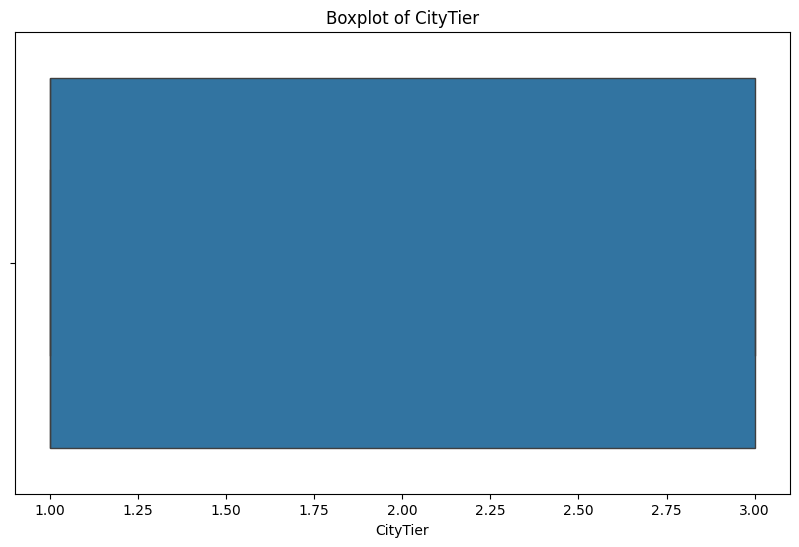

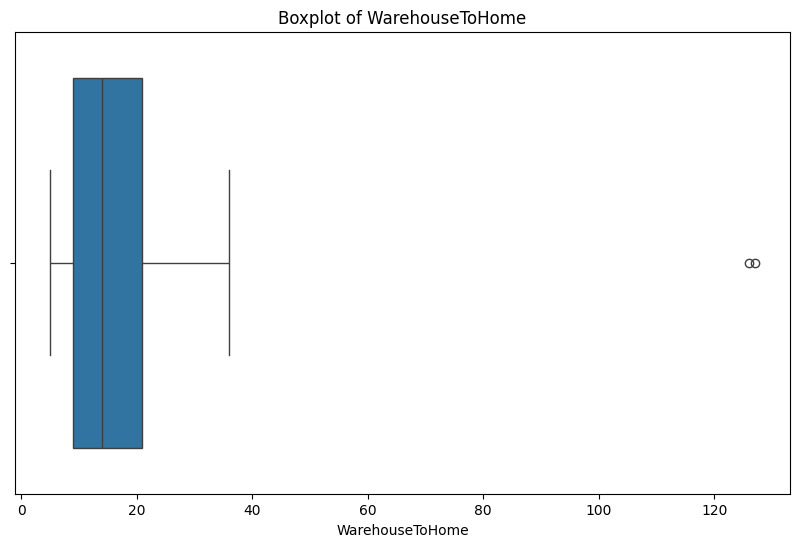

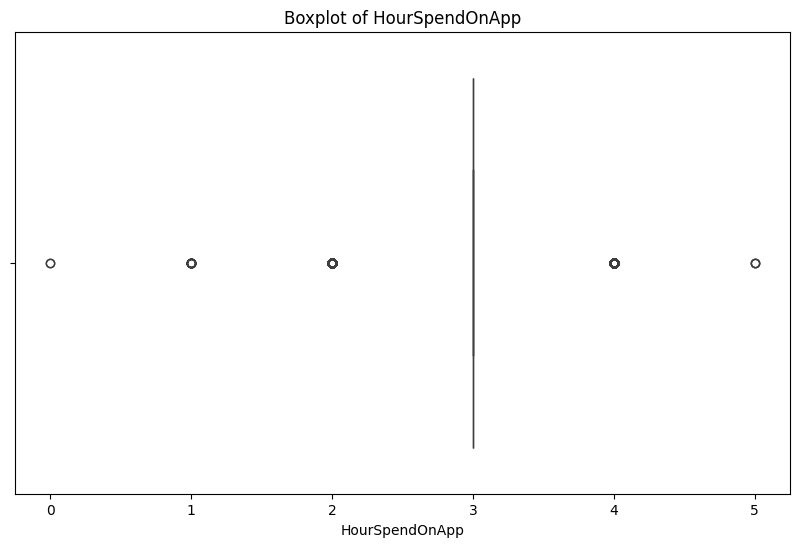

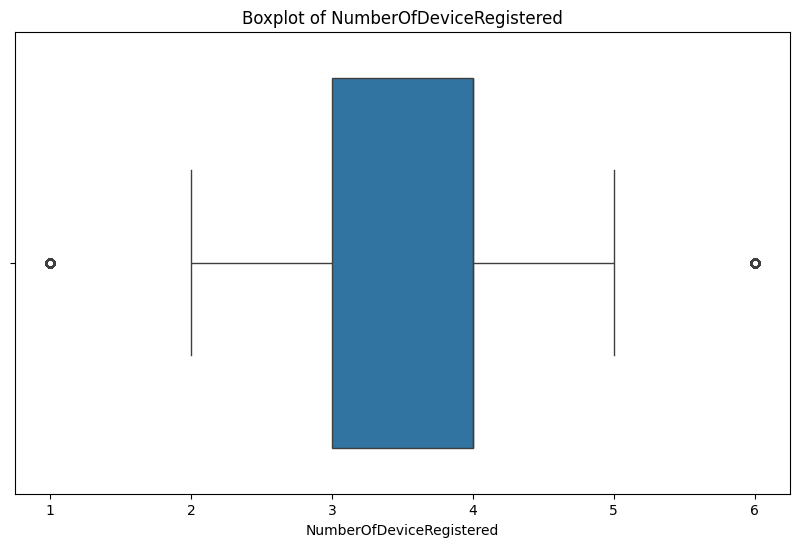

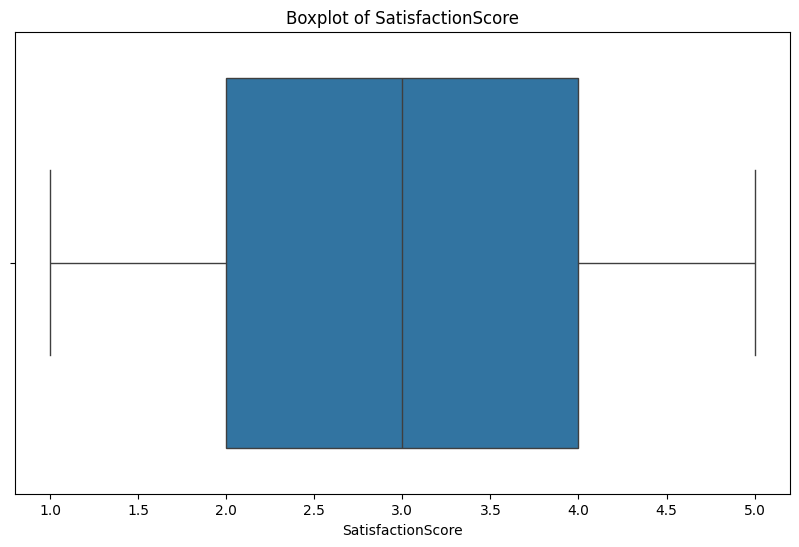

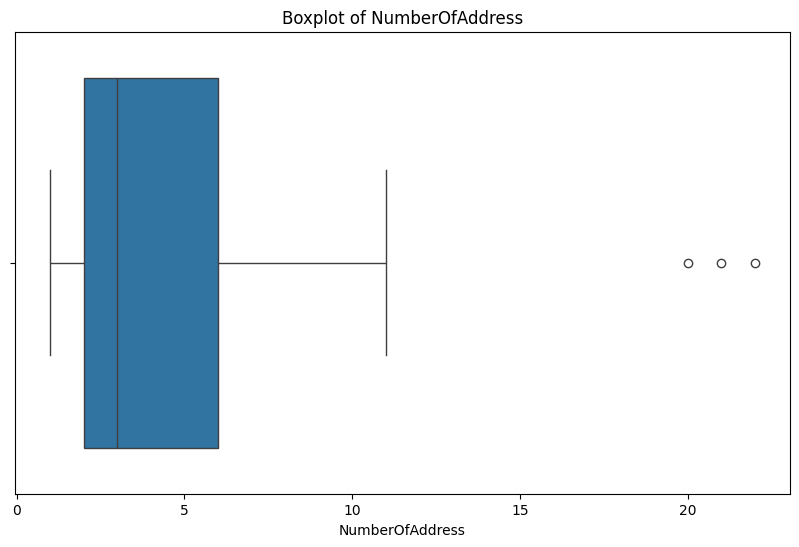

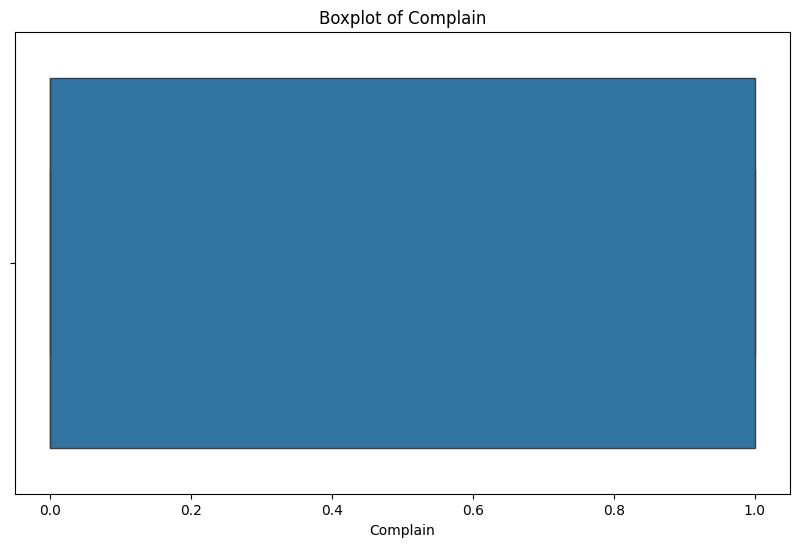

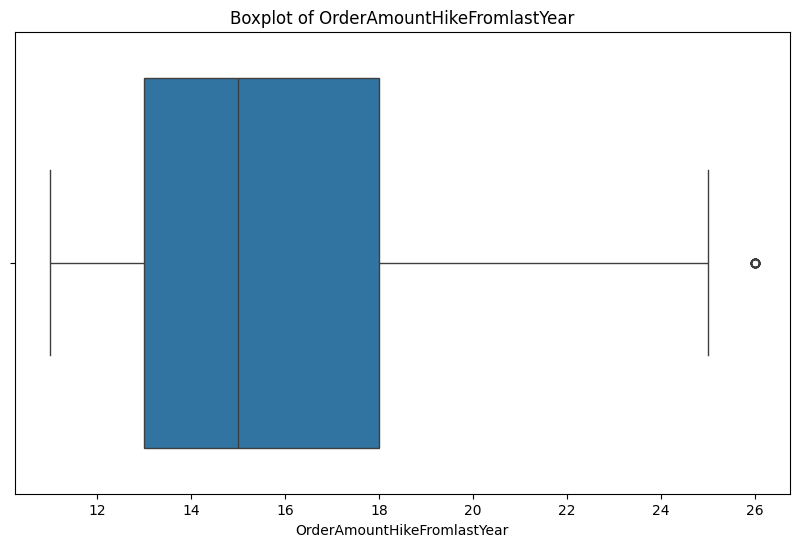

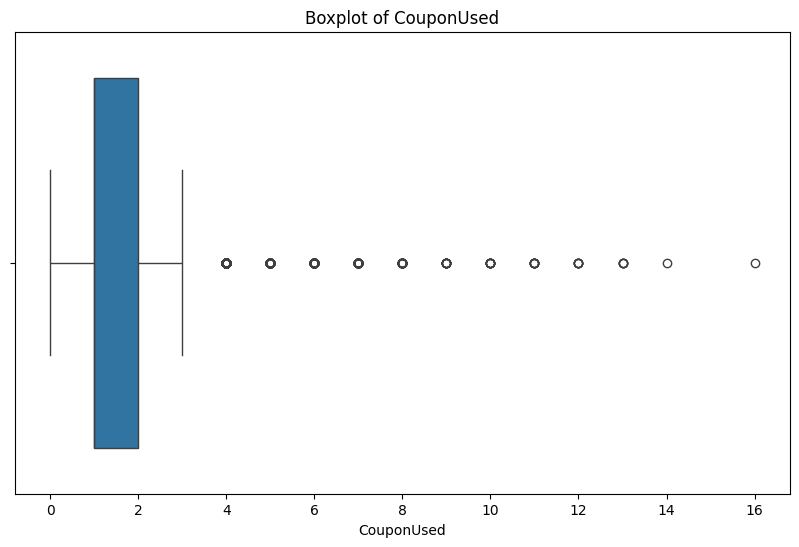

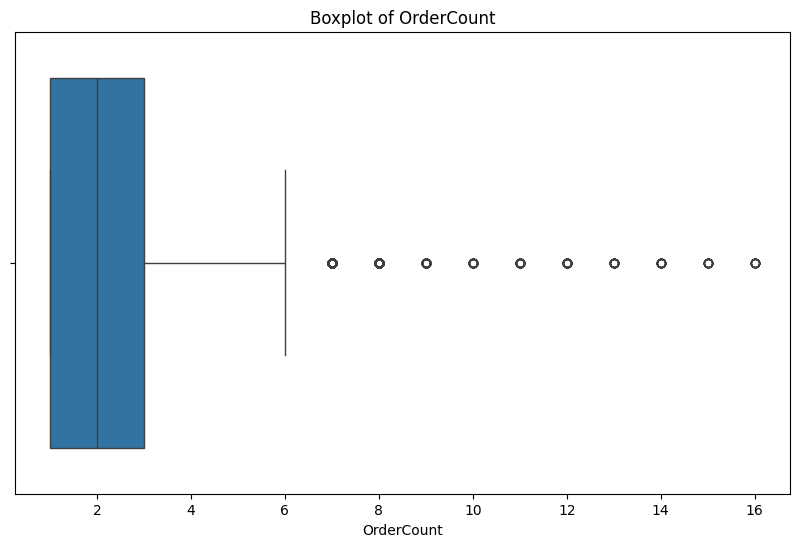

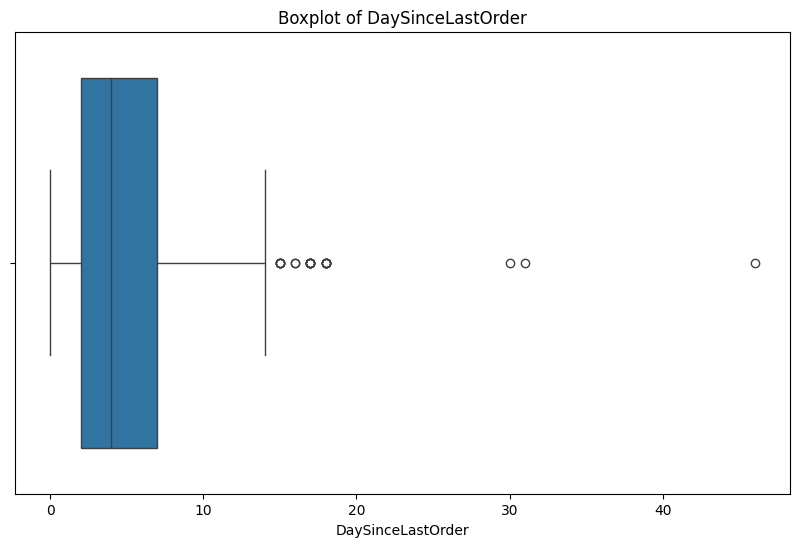

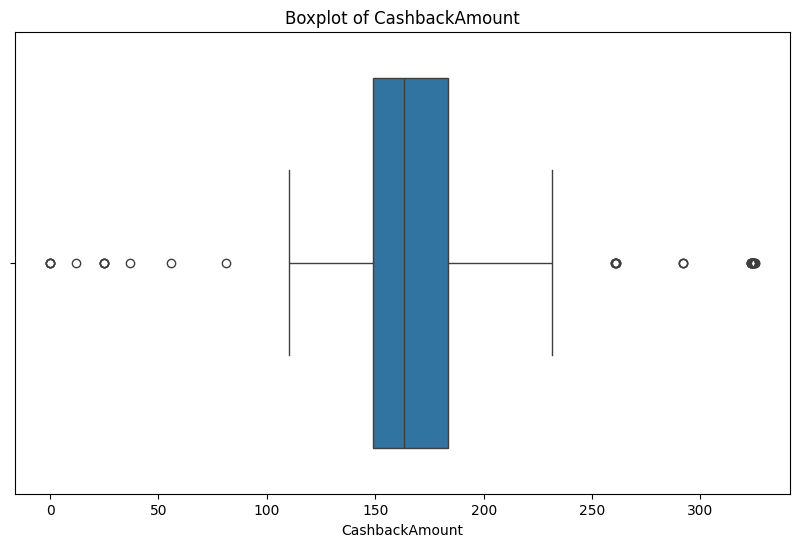

In [11]:
# Nummeric data:

numeric_cols = df.loc[:, df.dtypes != object].columns.tolist()
numeric_cols.remove('CustomerID')
numeric_cols.remove('Churn')

for col in numeric_cols:
    print(f"Unique values of {col}: {df[col].nunique()}")

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# Category data:

cate_cols = df.loc[:, df.dtypes == object].columns.tolist()

for col in cate_cols:
    print(f"Unique values of {col}: {df[col].nunique()}")

Unique values of PreferredLoginDevice: 3
Unique values of PreferredPaymentMode: 7
Unique values of Gender: 2
Unique values of PreferedOrderCat: 6
Unique values of MaritalStatus: 3


-> Resonable number of unique values in each Category features

#### **3/  Bivariate and Multivariate Analysis**

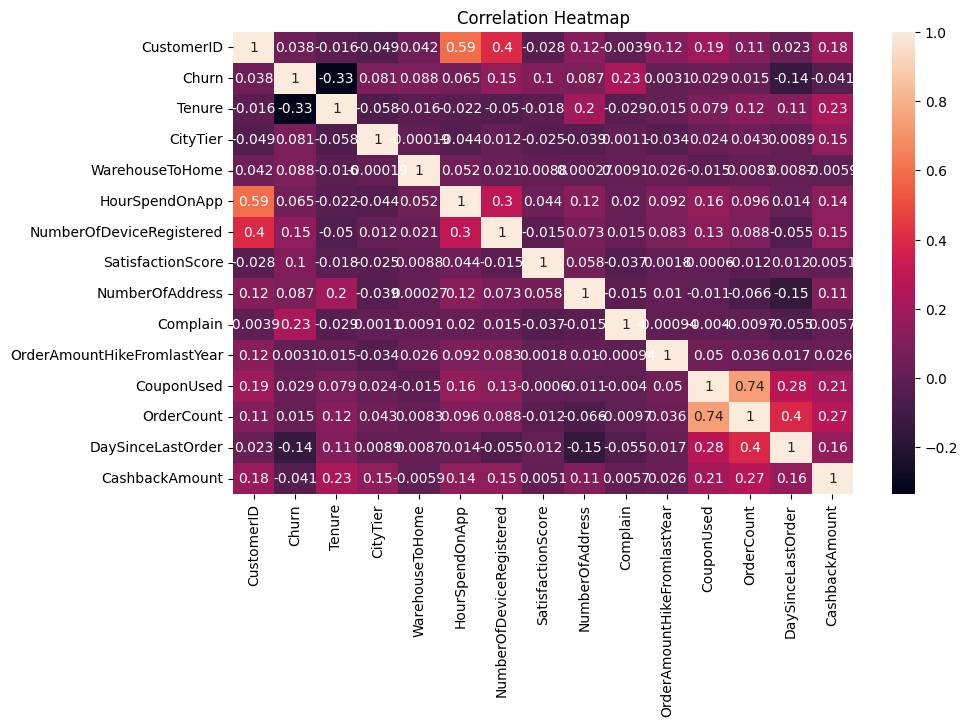

In [13]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix for numeric data
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.heatmap(df[numeric_cols].corr(), annot=True)  # Create the heatmap with annotations
plt.title('Correlation Heatmap')  # Add a title
plt.show()  # Display the plot


-> Churn has a weak positively correlation with Complain(0.23), a weeak negative correlation with Tenure(-0.33)

-> This means users who complain more tend to churn more and user who have been using the app for a long time tend not to churn.

## **Supervised Model Training:**

### **Feature Engineering**

In [14]:
# Transform categorical columns
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head(3)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20.0,3,7.0,4.0,4,5,3,0,...,True,False,False,False,False,False,False,False,True,False
2,52972,0,16.0,3,7.0,3.0,4,3,3,0,...,False,False,True,False,True,False,False,False,False,False
3,53125,0,5.0,1,16.0,3.0,4,4,3,0,...,False,False,True,False,False,False,False,False,True,False


In [15]:
# Balancing the Churn classes
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

from collections import Counter
print(Counter(y_smote))

Counter({0: 3396, 1: 3396})


### **Random Forest**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[674  17]
 [ 16 652]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       691
           1       0.97      0.98      0.98       668

    accuracy                           0.98      1359
   macro avg       0.98      0.98      0.98      1359
weighted avg       0.98      0.98      0.98      1359



-> The model correctly identifies 98% of actual non-churned users and 98% of actual churned users are correctly identified by the model. In addition, the overall accuracy of the predictions made by the model are 98% correct.

### **Behaviors Of Churned User**

                                    index  Gini-importance
0                PreferedOrderCat_Grocery         0.000568
1                 PreferedOrderCat_Others         0.001469
2                 PreferedOrderCat_Mobile         0.002669
3   PreferredPaymentMode_Cash on Delivery         0.002970
4                PreferredPaymentMode_UPI         0.005286
5       PreferredLoginDevice_Mobile Phone         0.011135
6              PreferredLoginDevice_Phone         0.012465
7     PreferedOrderCat_Laptop & Accessory         0.012861
8                                Complain         0.013070
9                PreferredPaymentMode_COD         0.014384
10       PreferredPaymentMode_Credit Card         0.016145
11        PreferredPaymentMode_Debit Card         0.016457
12          PreferredPaymentMode_E wallet         0.017429
13                               CityTier         0.018488
14               NumberOfDeviceRegistered         0.019242
15                      SatisfactionScore         0.0222

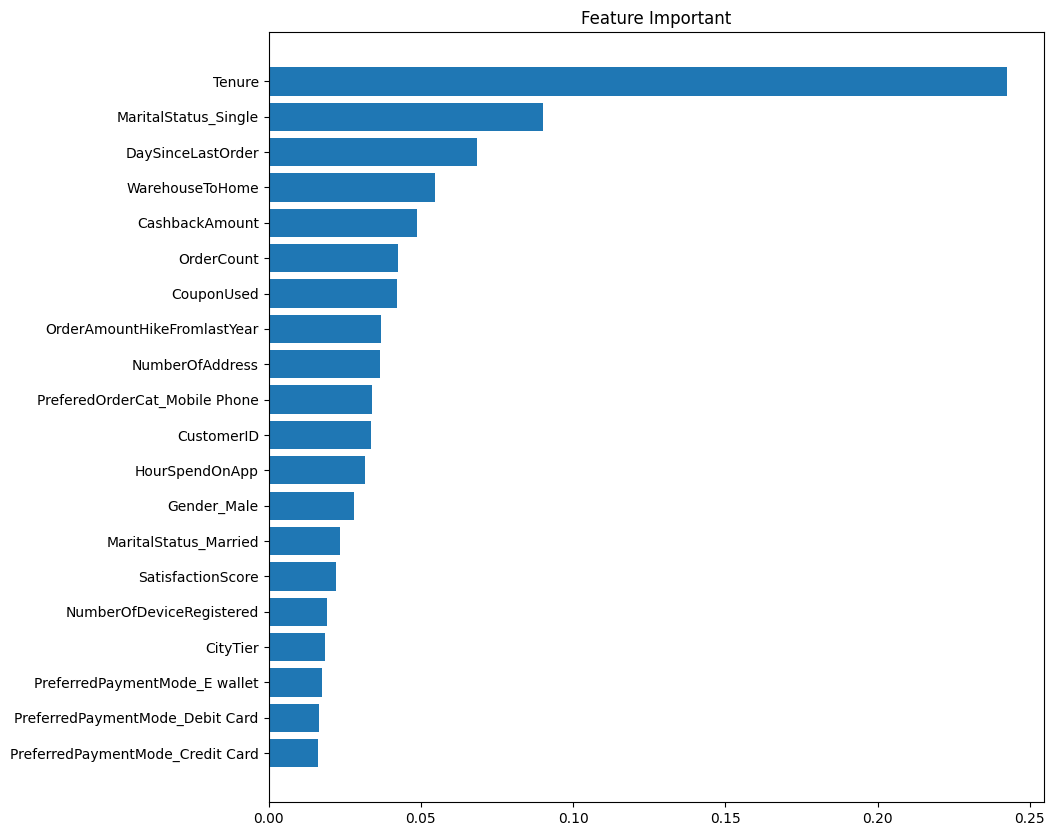

In [17]:
feats = {}
for feature, importance in zip(X_test.columns, rf_model.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)
importances = importances.reset_index()
print(importances)
# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

The following features have been identified as important in predicting churn:

* Tenure (24.3%)

* Marital Status (Single: 9%)

* Day Since Last Order (6.8%)

* Warehouse to Home (5.5%)

* Cashback Amount (4.9%)

* Coupon Used (4.2%)

* Order Count (4.2%)

* Hour Spend on App (3.2%)





In [18]:
df_churn= df_encoded[df_encoded['Churn']==1]

<ipython-input-19-75eb5e220142>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')


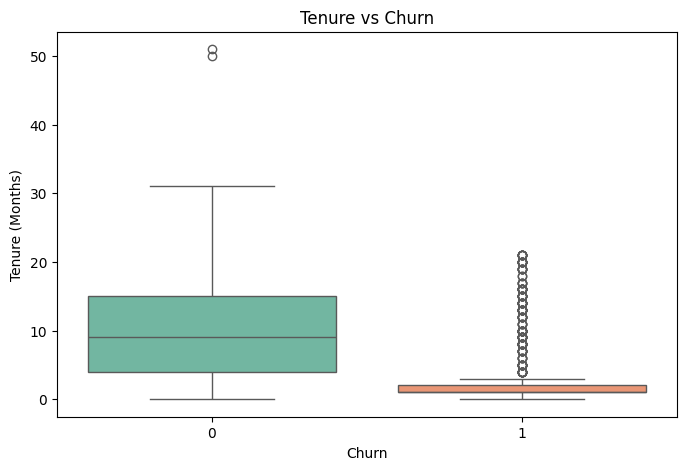

In [19]:
# Box Plot for Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


-> Users with a shorter duration of engagement with the platform are more likely to churn

-> New customers might not be finding enough value or satisfaction within their initial experience. Targeted onboarding processes or engagement strategies could help retain these users.

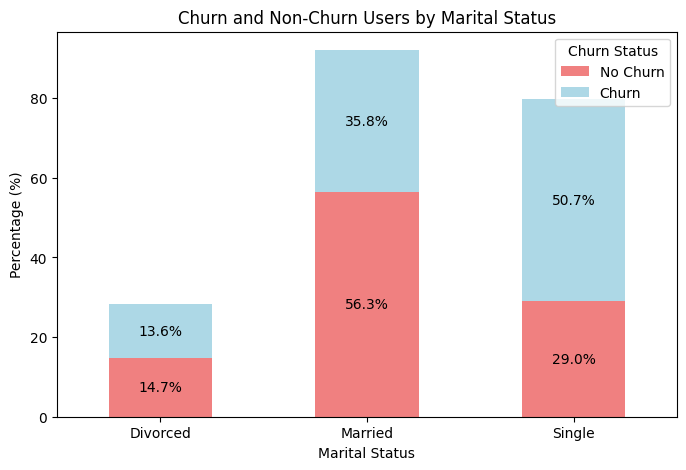

In [20]:
# Create a pivot table to calculate counts of churned and non-churned users
marital_churn_counts = df.groupby(['MaritalStatus', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
marital_churn_percent = marital_churn_counts.div(marital_churn_counts.sum(axis=0), axis=1) * 100

# Create a stacked bar plot
ax = marital_churn_percent.plot(kind='bar', stacked=True, figsize=(8, 5), color=['lightcoral', 'lightblue'])

# Add titles and labels
plt.title('Churn and Non-Churn Users by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
plt.legend(title='Churn Status', labels=['No Churn', 'Churn'], loc='upper right')

# Display percentage on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()


-> The significance of marital status suggests that single users may have a higher likelihood of churning compared to married users

-> Need to understanding the preferences and behaviors of single users to tailor marketing strategies or offers that resonate with this demographic.

<ipython-input-21-47b40ded4b1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette='Set2')


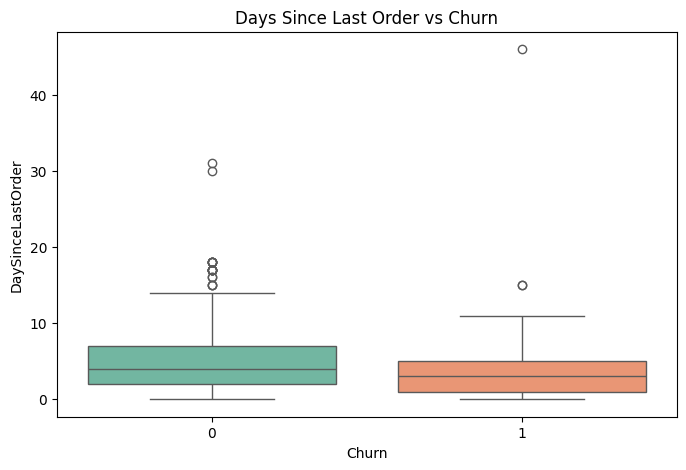

In [21]:
# Box Plot for Days Since Last Order vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette='Set2')
plt.title('Days Since Last Order vs Churn')
plt.show()

-> Users who have recently placed orders may be more likely to churn, indicating that they might not find sufficient value in the service or product offered after their initial engagement.

<ipython-input-22-2c29ca78b226>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='WarehouseToHome', data=df, palette='Set2')


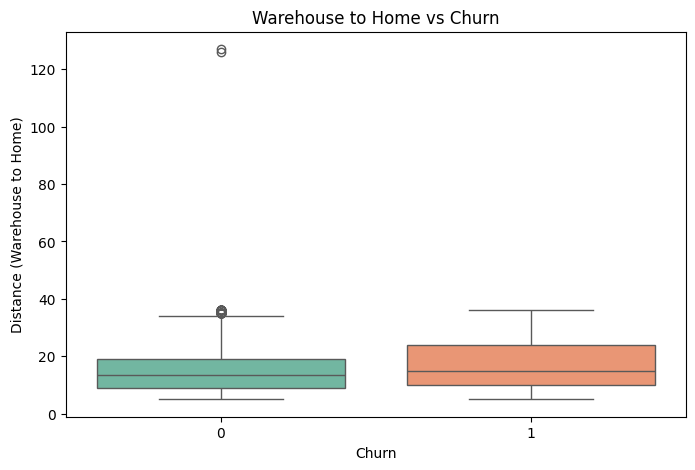

In [22]:
# Box Plot for Warehouse to Home vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='WarehouseToHome', data=df, palette='Set2')
plt.title('Warehouse to Home vs Churn')
plt.xlabel('Churn')
plt.ylabel('Distance (Warehouse to Home)')
plt.show()

-> Churned users tend to have their home futher from the Warehouse since distance from the warehouse to the customer's home can significantly affect delivery speed and customer satisfaction, thereby influencing their likelihood to churn

-> Reducing delivery times by optimizing warehouse locations or enhancing logistics strategies for customers living farther away may help improve customer satisfaction and retention

<ipython-input-23-b82e8141e1cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='CashbackAmount', data=df, palette='Set2')


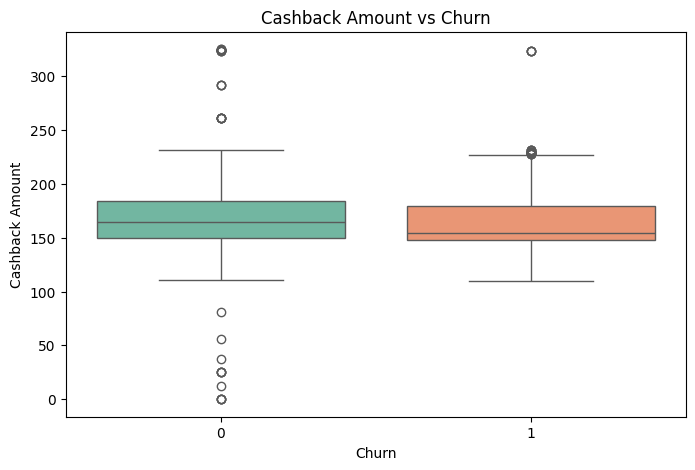

In [23]:
# Box Plot for Cashback Amount vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='CashbackAmount', data=df, palette='Set2')
plt.title('Cashback Amount vs Churn')
plt.xlabel('Churn')
plt.ylabel('Cashback Amount')
plt.show()


-> Churned users tend to receive less cash back amount

<Figure size 800x500 with 0 Axes>

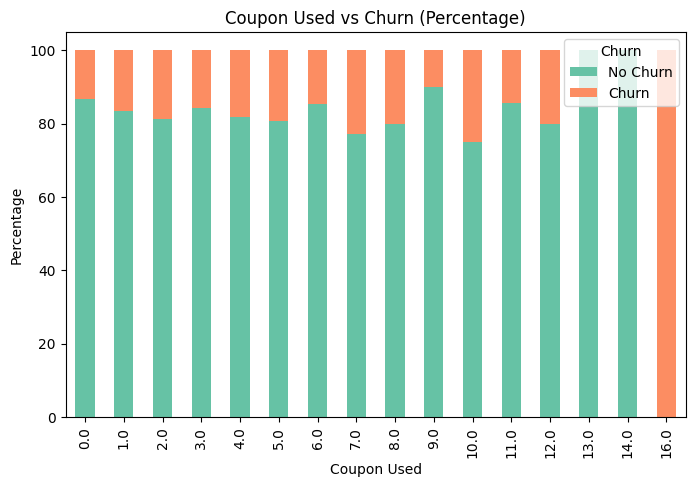

In [24]:
plt.figure(figsize=(8, 5))
# Create a new DataFrame to calculate the percentage of churn within each CouponUsed group
coupon_churn = pd.crosstab(df['CouponUsed'], df['Churn'], normalize='index') * 100

# Create a stacked bar plot for better comparison
coupon_churn.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(8, 5))

# Customize plot
plt.title('Coupon Used vs Churn (Percentage)')
plt.xlabel('Coupon Used')
plt.ylabel('Percentage')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


-> The percentage of churned users who use coupon is lower suggesting that users who do not utilize these promotions are more likely to churn

-> Offering better incentives or personalized promotions could enhance user retention, particularly for those who show low engagement with existing offers.

<ipython-input-25-7db033d1a347>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette='Set2')


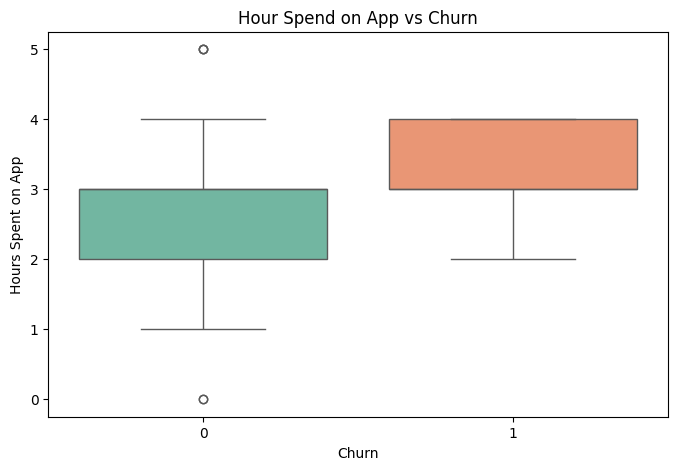

In [25]:
# Box Plot for Hour Spend on App vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette='Set2')
plt.title('Hour Spend on App vs Churn')
plt.xlabel('Churn')
plt.ylabel('Hours Spent on App')
plt.show()


-> Users spending longer hours on the app tend to have a higher churn rate, suggeting that they might need to spend too much time finding the products they need

-> Enhancing user experience to dencrease time spent on the app through improved search functionality, user-friendly navigation, personalized recommendations, and streamlined checkout processes can help users find what they need more efficiently  .

## **Unsupervised Model Training**

### **Dimension Reduction**

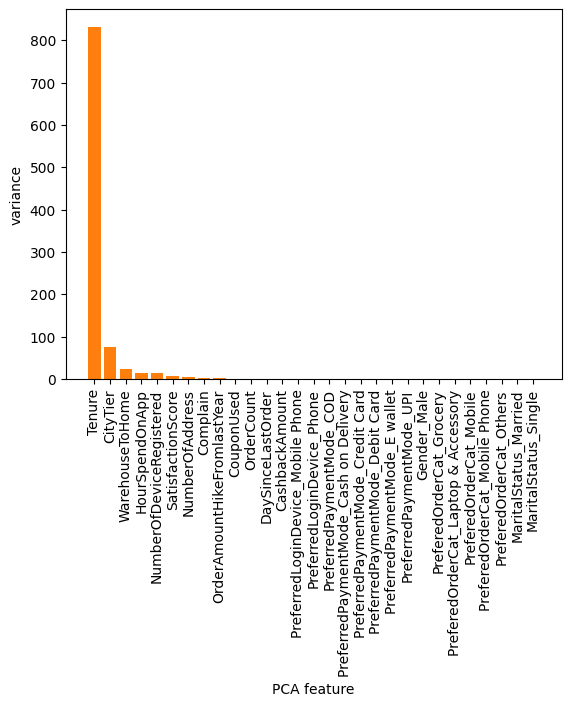

In [26]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(df_churn.drop(['Churn', 'CustomerID'], axis=1))
features= df_churn.drop(['Churn','CustomerID'], axis=1).columns
plt.bar(features, pca.explained_variance_)
plt.xticks(rotation=90)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

-> 3 intrinsic dimensions -> keep 3 PCA components

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X = df_churn.drop('Churn', axis=1)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=3))
PCA_transformed = pipeline.fit_transform(X)
PCA_df = pd.DataFrame(PCA_transformed, columns=["col1", "col2", "col3"])
PCA_df.head()

,col1,col2,col3
0,-2.074024,1.363370,1.733722
1,-2.222455,1.579607,2.136239
2,-0.017911,0.485031,1.524629
3,-1.199052,0.405933,1.343043
4,-0.613865,1.109340,0.806529


In [28]:
pca.explained_variance_ratio_

array([8.50694995e-01, 7.78503220e-02, 2.42258287e-02, 1.46662799e-02,
       1.33678741e-02, 6.71807686e-03, 4.90708050e-03, 1.81530560e-03,
       1.27426524e-03, 9.71849136e-04, 8.73974520e-04, 4.37768078e-04,
       3.85018815e-04, 2.99615689e-04, 2.46648141e-04, 2.41215549e-04,
       2.30952358e-04, 2.05116277e-04, 1.50130363e-04, 1.02751722e-04,
       9.75228507e-05, 7.75292771e-05, 6.17113190e-05, 5.55564499e-05,
       2.05319041e-05, 1.25826749e-05, 4.75504317e-06, 3.43472526e-06,
       1.30762177e-06])

### **K-Means model**

#### 1. Choosing K:

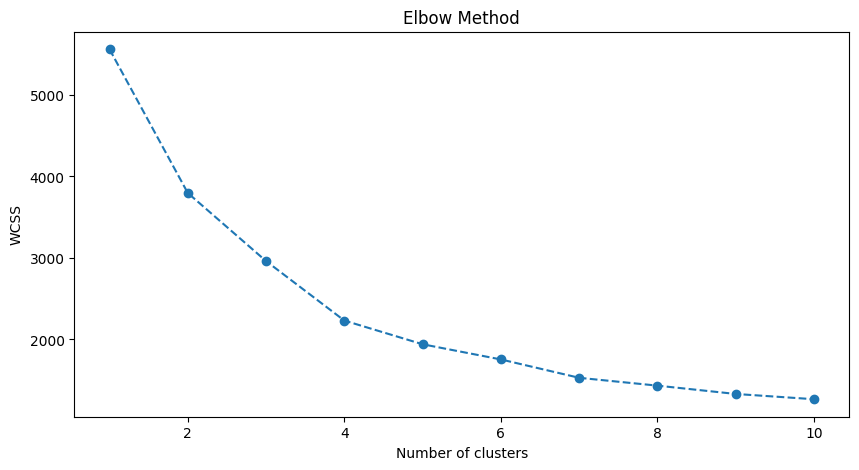

In [29]:
ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_df)
    # Inertia method returns WCSS for that model
    ss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

--> We will choose k=4

#### 2. Apply K-Means:

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_df)

PCA_df['clusters']=predicted_labels
df_churn['clusters']=predicted_labels

<ipython-input-30-7323f2372824>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['clusters']=predicted_labels


In [31]:
df_churn.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,clusters
7,53583,1,1.0,1,17.0,4.0,5,4,3,1,...,False,False,False,False,False,True,False,False,True,3
24,55053,1,1.0,1,17.0,4.0,5,4,3,1,...,False,False,False,False,False,True,False,False,True,3
68,52834,1,1.0,1,14.0,4.0,6,3,3,1,...,False,True,False,True,False,False,False,False,True,3
78,53347,1,1.0,1,32.0,3.0,4,2,3,1,...,False,True,False,False,False,True,False,False,True,3
79,53391,1,21.0,1,9.0,3.0,4,3,6,0,...,False,True,False,False,False,True,False,False,True,3


#### 3. Evaluating Model:

The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

##### a, t_SNE:

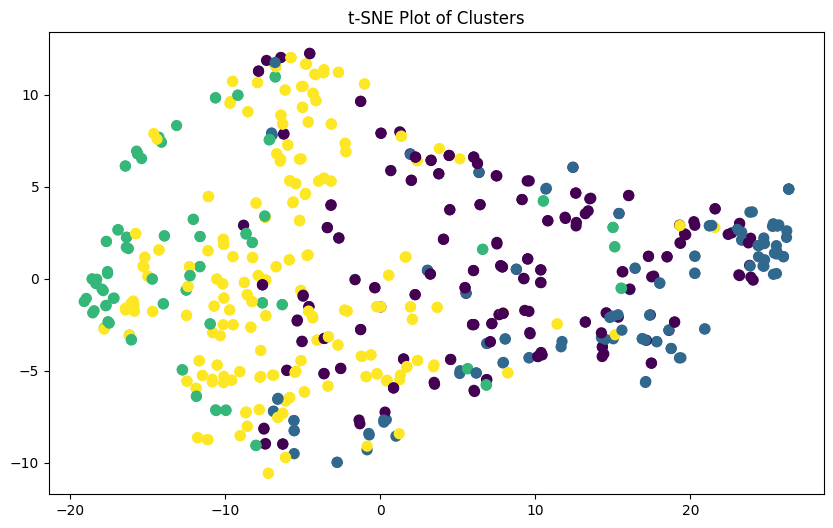

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df_churn[features])

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_churn['clusters'], cmap='viridis', s=50)
plt.title('t-SNE Plot of Clusters')
plt.show()

-> Well separted groups

##### b, Silhouette Score:

In [33]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_df, predicted_labels)
print(sil_score)

0.4180644273018283


-> The silhouette score around 0.5 indicates a moderately well-defined clustering structure, with clusters being reasonably distinct and separated.

#### 4. Clusters characteristic:

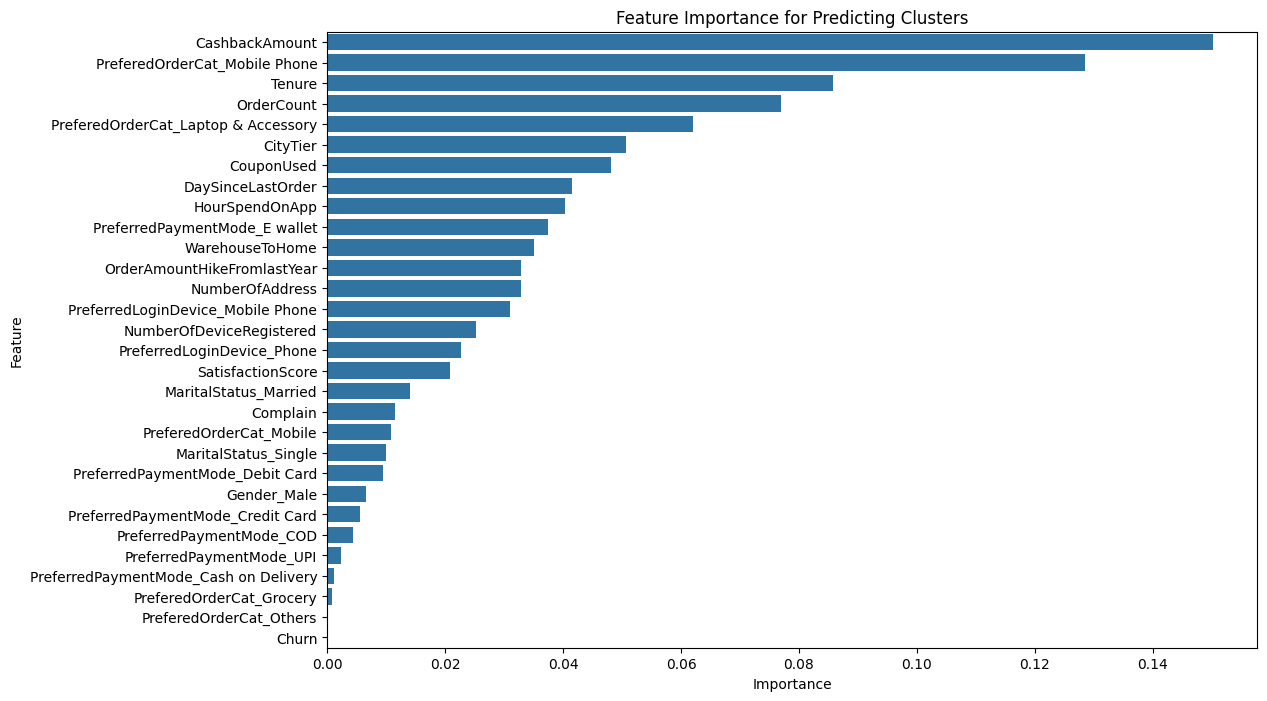

In [34]:
# Apply Random Forest to find the features that are important in predicting the clusters
X = df_churn.drop(columns=['clusters', 'CustomerID'])
y = df_churn['clusters']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns

feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance for Predicting Clusters')
plt.show()


-> Use top 6 important features to analyze the differences among the churned users cluster

<ipython-input-35-850077d5deb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_churn["clusters"], palette= pal)


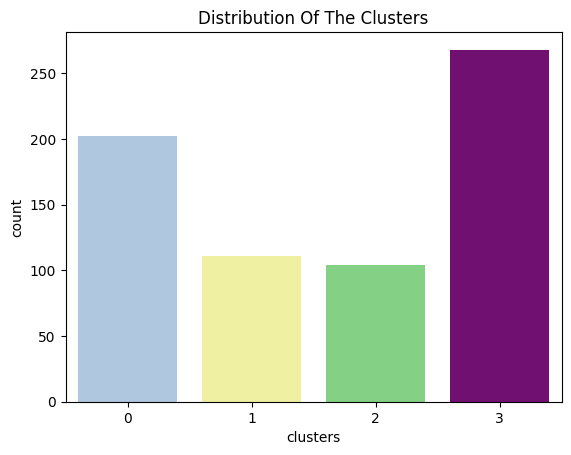

In [35]:
pal = ["#A7C7E7","#FDFD96", "#77DD77",'purple']
pl = sns.countplot(x=df_churn["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-36-84fd31f46a18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clusters', y='CashbackAmount', data=df_churn, palette='Blues')


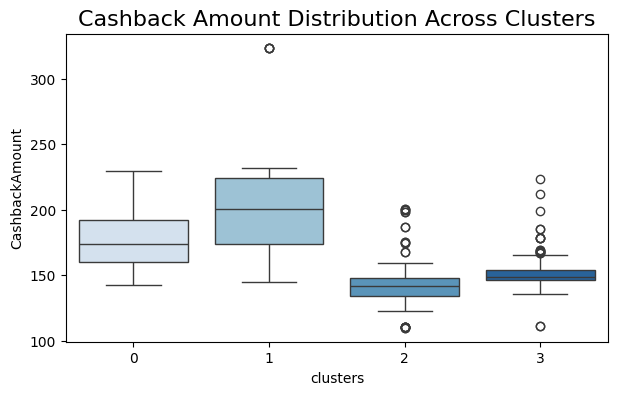

In [36]:
# CashbackAmount vs Clusters
plt.figure(figsize=(7, 4))
sns.boxplot(x='clusters', y='CashbackAmount', data=df_churn, palette='Blues')
plt.title('Cashback Amount Distribution Across Clusters', fontsize=16)
plt.show()


- **Cluster 0**: This cluster has a median cashback amount of approximately 175, making it the second highest among the clusters. The values range from around 140 to 230, and the distribution is symmetrical with no significant outliers.

- **Cluster 1**: Featuring the highest median cashback amount at around 200, Cluster 1 also displays the greatest variability, as indicated by a larger interquartile range (IQR). Values extend from about 150 to over 230, with no significant outliers present.

- **Cluster 2**: With the lowest median cashback amount near 140, Cluster 2 shows little variance. However, it does include multiple outliers that stretch up to about 200.

- **Cluster 3**: Similar to Cluster 2, this cluster has a median close to 150, which is the third highest. It contains multiple outliers, with some cashback amounts reaching up to 230, while the majority of values remain concentrated in the lower range.

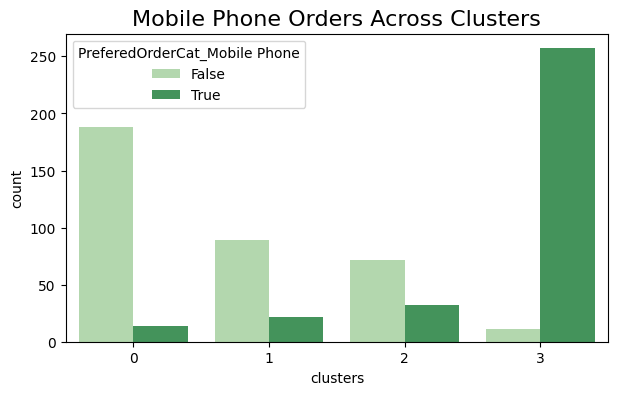

In [37]:
# Count of PreferredOrderCat_Mobile Phone in each cluster
plt.figure(figsize=(7, 4))
sns.countplot(x='clusters', hue='PreferedOrderCat_Mobile Phone', data=df_churn, palette='Greens')
plt.title('Mobile Phone Orders Across Clusters', fontsize=16)
plt.show()


- The number of churned users who prefer to order mobile phones increases from Cluster 0 to Cluster 3, with **Cluster 3** exhibiting a **distinctively high** number of preferred orders for mobile phones.

<ipython-input-38-6c9b00557b2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clusters', y='Tenure', data=df_churn, palette='Purples')


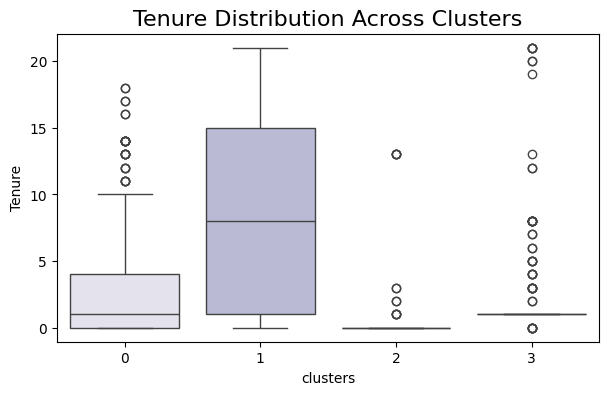

In [38]:
# Tenure vs clusters
plt.figure(figsize=(7, 4))
sns.boxplot(x='clusters', y='Tenure', data=df_churn, palette='Purples')
plt.title('Tenure Distribution Across Clusters', fontsize=16)
plt.show()


- **Cluster 1** has the highest median tenure at around 7, along with the highest variance (ranging from 1 to 20), indicating that churned users in this cluster tend to have longer tenures with the company, showcasing a diverse range of experiences.

- **Cluster 0** has the second-highest median tenure at approximately 2, with a variance from 1 to 10 and some higher outliers. This suggests that while 75% of users have relatively short tenures (below 4), there is a notable 25% of long-term users in this cluster, with tenures ranging from above 4 to around 10.

- **Cluster 2** and **Cluster 3** both exhibit low median tenures, around 1 and 2, respectively. Their small interquartile range (IQR) indicates that users in these clusters are relatively new to the company.

<ipython-input-39-8eed7e5b3a6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clusters', y='OrderCount', data=df_churn, palette='Oranges')


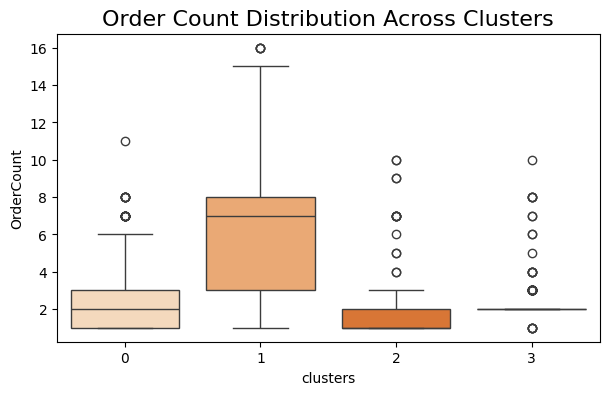

In [39]:
# OrderCount vs clusters
plt.figure(figsize=(7, 4))
sns.boxplot(x='clusters', y='OrderCount', data=df_churn, palette='Oranges')
plt.title('Order Count Distribution Across Clusters', fontsize=16)
plt.show()


- **Cluster 1** has the highest median order count, around 7, and the largest interquartile range (IQR), indicating a broad spread in order counts. 75% of users in this cluster place between 1 and 8 orders, while the top 25% place between 8 and 15. This suggests **Cluster 1** users are highly active, with many making frequent purchases.

- **Cluster 0** has the second-highest median order count, about 2. 75% of users place between 1 and 3 orders, with the remaining 25% placing between 3 and 6 orders. This indicates moderate purchasing activity.

- **Cluster 2** and **Cluster 3** have relatively low median order counts. **Cluster 2** users typically place between 1 and 3 orders, while **Cluster 3** users mostly place around 2 orders. These clusters represent users with lower purchasing activity compared to **Cluster 0** and **Cluster 1**.

Overall, there are clear differences in ordering behavior across clusters, with **Cluster 1** being the most active and **Cluster 2** and **Cluster 3** representing lower activity levels.

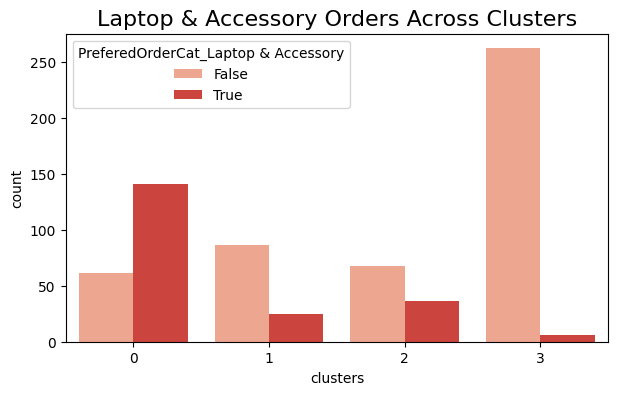

In [40]:
# Count of PreferredOrderCat_Laptop & Accessory in each cluster
plt.figure(figsize=(7, 4))
sns.countplot(x='clusters', hue='PreferedOrderCat_Laptop & Accessory', data=df_churn, palette='Reds')
plt.title('Laptop & Accessory Orders Across Clusters', fontsize=16)
plt.show()


- **Cluster 0** has the highest overall number of laptop and accessory orders, showing a distinctively high number of laptop orders compared to the other clusters. Following this are **Cluster 2**, **Cluster 1**, and **Cluster 3**, with the number of orders decreasing in that order.

Overall, the chart indicates that laptop and accessory orders are most popular in **Cluster 0**, with a clear preference among users for placing orders in this category. This suggests that **Cluster 0** users have a strong inclination towards purchasing laptops and accessories compared to users in other clusters.

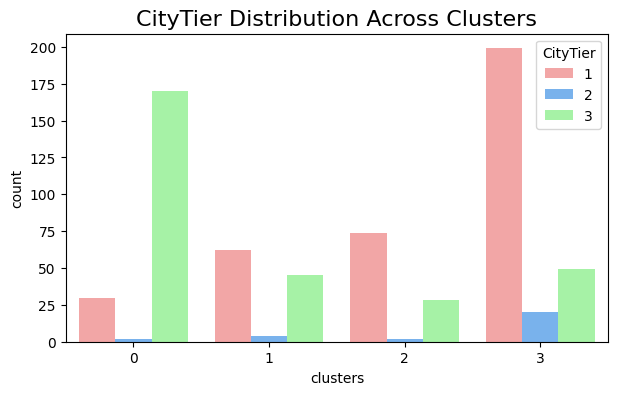

In [41]:
citytier_colors = ['#FF9999', '#66B2FF', '#99FF99']
# Count of CityTier in each cluster
plt.figure(figsize=(7, 4))
sns.countplot(x='clusters', hue='CityTier', data=df_churn,
              palette=sns.color_palette(citytier_colors), hue_order=[1, 2, 3])
plt.title('CityTier Distribution Across Clusters', fontsize=16)
plt.show()


- **Cluster 0** is dominated by users from **CityTier 3**, with a very high count compared to other city tiers. There is a small presence of **CityTier 1** users and virtually no **CityTier 2** users.
  
- **Cluster 1** has a balanced mix between **CityTier 1** and **CityTier 3**, with **CityTier 1** having a slightly higher count. **CityTier 2** is barely present.

- **Cluster 2** is similar to **Cluster 1**, with users primarily from **CityTier 1** but also some presence from **CityTier 3**. **CityTier 2** again has almost no representation.

- **Cluster 3** is heavily dominated by **CityTier 1** users, with a significant count. **CityTier 3** has a much smaller representation, while **CityTier 2** has a very low count.

- Overall, **CityTier 3** is most prominent in **Cluster 0**, while **CityTier 1** dominates **Cluster 3**. **CityTier 2** has very few users across all clusters.